In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

(213, 212, 3)


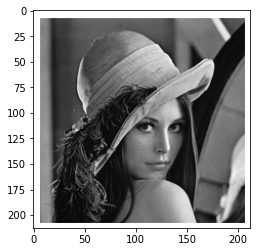

In [3]:
img = mpimg.imread('./doc/code/pca/original.png')
plt.imshow(img)
print(img.shape)

(90, 90)


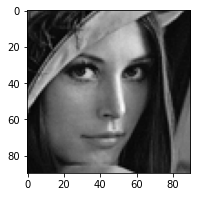

In [4]:
#Reducing the amount of pixels
img_first_channel = img[:,:,0]
img_first_channel.shape
img_first_channel = img_first_channel[80:170,80:170]
print(img_first_channel.shape)

fig, ax = plt.subplots(figsize=(6, 3))
ax.imshow(img_first_channel, cmap='gray')

In [5]:
plain = img_first_channel.reshape((1,-1)) #Flatten image
plain.shape

(1, 8100)

In [6]:
#Defining the goal
features = plain.shape[1]
obj = features//2
print(features, obj)

8100 4050


Epoch 1 ==> Loss: 0.33726924657821655
Epoch 2 ==> Loss: 0.30187830328941345
Epoch 3 ==> Loss: 0.2635442614555359
Epoch 4 ==> Loss: 0.24451544880867004
Epoch 5 ==> Loss: 0.22835421562194824
Epoch 6 ==> Loss: 0.21643944084644318
Epoch 7 ==> Loss: 0.20870184898376465
Epoch 8 ==> Loss: 0.20727749168872833
Epoch 9 ==> Loss: 0.200408935546875
Epoch 10 ==> Loss: 0.1954842209815979
Epoch 11 ==> Loss: 0.19269506633281708
Epoch 12 ==> Loss: 0.19604533910751343
Epoch 13 ==> Loss: 0.1922898292541504
Epoch 14 ==> Loss: 0.20138157904148102
Epoch 15 ==> Loss: 0.1963692307472229
Epoch 16 ==> Loss: 0.19390445947647095
Epoch 17 ==> Loss: 0.19266264140605927
Epoch 18 ==> Loss: 0.19473379850387573
Epoch 19 ==> Loss: 0.19114531576633453
Epoch 20 ==> Loss: 0.19303251802921295
Epoch 21 ==> Loss: 0.18681319057941437
Epoch 22 ==> Loss: 0.19073136150836945
Epoch 23 ==> Loss: 0.19307850301265717
Epoch 24 ==> Loss: 0.19691535830497742
Epoch 25 ==> Loss: 0.19510076940059662
Epoch 26 ==> Loss: 0.18806809186935425
E

Epoch 212 ==> Loss: 0.3141382932662964
Epoch 213 ==> Loss: 0.31274881958961487
Epoch 214 ==> Loss: 0.3106786012649536
Epoch 215 ==> Loss: 0.31086742877960205
Epoch 216 ==> Loss: 0.32212474942207336
Epoch 217 ==> Loss: 0.3145943582057953
Epoch 218 ==> Loss: 0.3170412480831146
Epoch 219 ==> Loss: 0.3186113238334656
Epoch 220 ==> Loss: 0.31127700209617615
Epoch 221 ==> Loss: 0.3089090585708618
Epoch 222 ==> Loss: 0.31585121154785156
Epoch 223 ==> Loss: 0.3142389953136444
Epoch 224 ==> Loss: 0.3151220679283142
Epoch 225 ==> Loss: 0.3055694103240967
Epoch 226 ==> Loss: 0.3101871907711029
Epoch 227 ==> Loss: 0.3026244044303894
Epoch 228 ==> Loss: 0.31138694286346436
Epoch 229 ==> Loss: 0.31535059213638306
Epoch 230 ==> Loss: 0.31180229783058167
Epoch 231 ==> Loss: 0.3115602433681488
Epoch 232 ==> Loss: 0.30818575620651245
Epoch 233 ==> Loss: 0.3109990954399109
Epoch 234 ==> Loss: 0.29925185441970825
Epoch 235 ==> Loss: 0.3016313910484314
Epoch 236 ==> Loss: 0.30588704347610474
Epoch 237 ==> 

Epoch 420 ==> Loss: 0.25528910756111145
Epoch 421 ==> Loss: 0.26470571756362915
Epoch 422 ==> Loss: 0.2587120234966278
Epoch 423 ==> Loss: 0.2547260522842407
Epoch 424 ==> Loss: 0.2573171555995941
Epoch 425 ==> Loss: 0.2577863335609436
Epoch 426 ==> Loss: 0.2617626190185547
Epoch 427 ==> Loss: 0.2563697099685669
Epoch 428 ==> Loss: 0.25809571146965027
Epoch 429 ==> Loss: 0.2603769898414612
Epoch 430 ==> Loss: 0.25853580236434937
Epoch 431 ==> Loss: 0.25709256529808044
Epoch 432 ==> Loss: 0.2568228542804718
Epoch 433 ==> Loss: 0.259543776512146
Epoch 434 ==> Loss: 0.2581005394458771
Epoch 435 ==> Loss: 0.25662052631378174
Epoch 436 ==> Loss: 0.25665098428726196
Epoch 437 ==> Loss: 0.2502051293849945
Epoch 438 ==> Loss: 0.25383472442626953
Epoch 439 ==> Loss: 0.2563479542732239
Epoch 440 ==> Loss: 0.26017463207244873
Epoch 441 ==> Loss: 0.2496710866689682
Epoch 442 ==> Loss: 0.25924357771873474
Epoch 443 ==> Loss: 0.2594372630119324
Epoch 444 ==> Loss: 0.24954183399677277
Epoch 445 ==> L

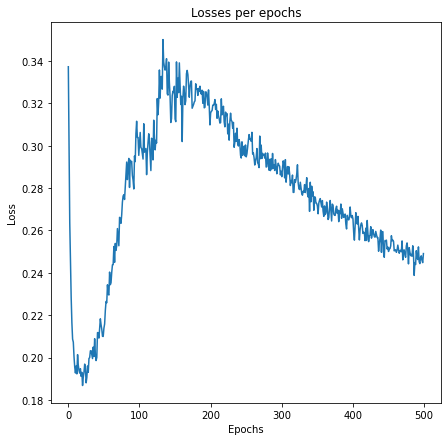

In [7]:
# Creating the model
%run "./RBM.py"

neural_net = RBM(features, obj)
history = neural_net.train(plain, l2_cost, verbose = True)

## showing stats
def plot(losses):
    plt.figure(figsize=(7, 7))
    plt.title('Losses per epochs')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot(losses)
    
plot(history)

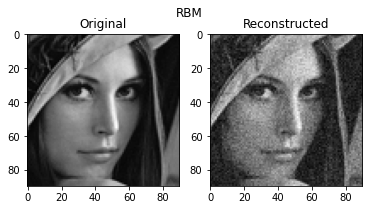

In [8]:
#Testing the network
reconstructed = neural_net.getReconstructedOutput(plain)

_aux = int(features ** (1/2))

fig, (vax, hax) = plt.subplots(1, 2, figsize=(6, 3))
vax.imshow(img_first_channel, cmap='gray')
vax.set_title('Original')
hax.imshow(reconstructed.reshape((1,_aux,_aux))[0], cmap='gray')
hax.set_title('Reconstructed')
plt.suptitle('RBM')
plt.savefig('simple_image_output.png')